In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df=pd.read_csv("studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


Text(0, 0.5, 'Exam')

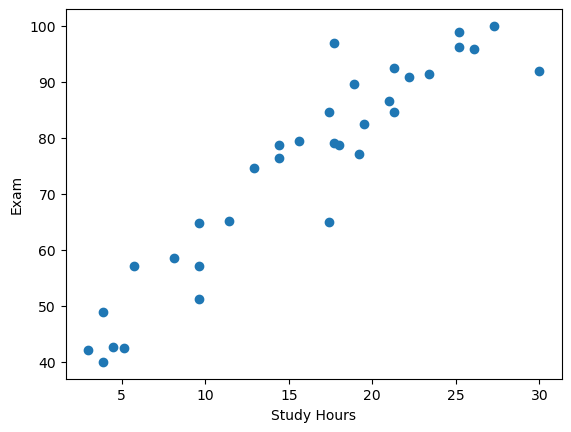

In [7]:
plt.scatter(df["Study Hours"],df["Exam Score"] )
plt.xlabel("Study Hours")
plt.ylabel("Exam")

In [24]:
X=df[["Study Hours"]]
y=df["Exam Score"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=15)

In [26]:
scaler=StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
regression=LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression()

In [30]:
print("Coefficient: ", regression.coef_) #X'in önündeki kat sayı
print("Intercept: ", regression.intercept_) #Y'eksenini kesen değer

Coefficient:  [16.17860223]
Intercept:  76.9076923076923


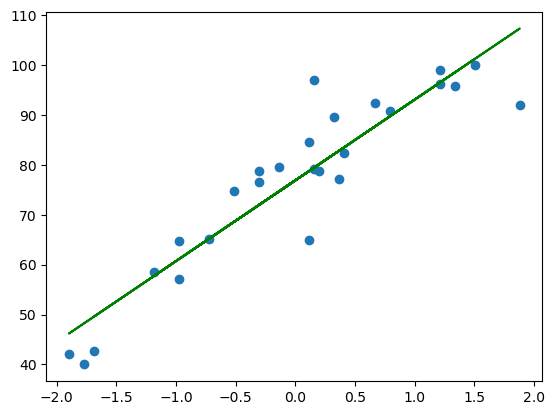

In [31]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train),"g")

In [32]:
y_pred_test=regression.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [34]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse= np.sqrt(mse)
print("MSE:" , mse)
print("MAE:" , mae)
print("RMSE:" , rmse)

MSE: 29.45839048833392
MAE: 4.054868128856142
RMSE: 5.427558427906043


In [35]:
r2= r2_score(y_test, y_pred_test)
print("r2 score", r2)

r2 score 0.9196596206825491


In [38]:
#Adjusted R2 Score
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.903591544819059